In [57]:
import numpy as np
import pylab as p
from mpl_toolkits.mplot3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Solitones de KdV

para hacer este desarrollo tendremos en cuenta las siguientes condiciones:

$u(x,t=0)=\frac{1}{2}(1-\tanh{\frac{x-25}{5}})$



nuestras constantes $\epsilon = 0.2$, $\mu = 0.1$, $\Delta x = 0.4$, $\Delta t = 0.1$ donde estas constantes satifacen $|u|=1$

In [58]:
#constantes
ds = 0.4
dt = 0.1
eps = 0.2
Max = 2000
mu = 0.1
mx = 131
m = 1

Se crean unos arrays "vacios" (en realidad llenos de 0) con el tamaño de la matriz que me proponen (en realidad el tamaño de la matriz puede cambiar)

In [59]:
u = np.zeros((mx,3),float)
spl = np.zeros((mx,21),float)

En esta parte del programa se hace la onda inicial, donde usamos la funcion que nos proponen y con esto creamos nuestra primera fila de la matriz para que luego acontinuacion, con base la primera fila que tengo pueda tener la segunda fila de la matriz.

In [60]:
#onda inicial 
for i in range(0,131):
    u[i,0] =0.5*(1-np.tanh((ds*i-25)/5))
#puntos iniciales y finales del grid
u[0,1] = 1
u[0,2] = 1
u[130,1] = 0
u[130,2] = 0

In [61]:
#Segundo paso de la onda inicial
for i in range(0,131,2):
    spl[i,0] = u[i,0]
    
fac = mu*dt/(ds**3) #Ecuacion númerica de la aproxiamcion de KdeV

aquí se hace un ciclo for para nuestro mirar nuestra posicion en un tiempo t=1, para esta parte usamos esta ecuacion númerica:

$\frac{\epsilon \Delta t(u_{i+1,1}+u_{i,1}+u_{i-1,1})}{\Delta x}$


ahora como lo necesitamos para un tiempo n se debe de hacer esta misma ecuacion para el tamaño de la matriz. dicho esto podemos ver esta ecuacion de esta manera:


$\frac{\epsilon \Delta t(u_{i+1,n}+u_{i,n}+u_{i-1,n})}{\Delta x}$

In [81]:
#primer tiempo
for  i in range (1, mx-1):                      
    a1 = eps*dt*(u[i + 1, 0] + u[i, 0] + u[i - 1, 0])/(ds*6.)     
    if i > 1 and  i < 129: 
        a2 = u[i+2,0]+2.*u[i-1,0]-2.*u[i+1,0]-u[i-2,0]
    else:  
        a2 = u[i-1, 0] - u[i+1, 0]
    a3 = u[i+1, 0] - u[i-1, 0] 
    u[i, 1] = u[i, 0] - a1*a3 - fac*a2/3. 

In [ ]:
#siguientes pasos de tiempos (los siguientes puntos para la graficar el soliton con el tiempo)
for j in range (1, Max+1):                     
    for i in range(1, mx-2):
        a1 = eps*dt*(u[i+1,1] + u[i, 1] + u[i-1,1])/(3.*ds)
        if i > 1 and i < mx-2:
            a2 = u[i+2,1] + 2.*u[i-1,1]- 2.*u[i+1,1]-u[i-2,1]
        else:  
            a2 = u[i-1, 1] - u[i+1, 1]  
        a3 = u[i+1, 1] - u[i-1, 1] 
        u[i, 2] = u[i,0] - a1*a3 - 2.*fac*a2/3.
    if j%100 ==  0:           
        for i in range (1, mx - 2): 
            spl[i, m] = u[i, 2]  
        m +=1     
    for k in range(0, mx):    
        u[k, 0] = u[k, 1]                
        u[k, 1] = u[k, 2]

Ahora solo graficamos nuestros arrays guardados despues de hacer todo ese proceso espacio-temporal, aclaro que los ejes son: distancia, tiempo y disturbio (mira el disturbio como lo agitado que estaba el fluido en ese momento en el espacio)

Text(0.5,0,'disturbio')

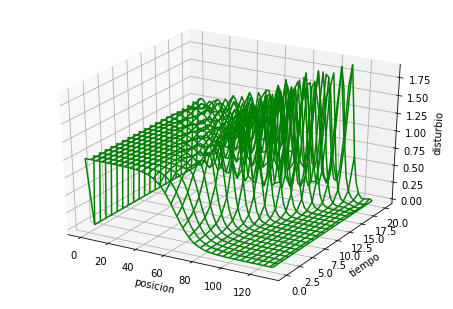

In [83]:
x = list(range(0,mx,2))
y = list(range(0,21))
X, Y = p.meshgrid(x,y)
fig = p.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,spl[X,Y], color="green")
ax.set_xlabel("posicion")
ax.set_ylabel("tiempo")
ax.set_zlabel("disturbio")

In [84]:
def functz(spl):                           
    z = spl[X, Y]       
    return z

Como se veria la matriz de nuestro sistema

In [85]:
functz(spl)

array([[ 9.99954602e-01,  9.99937482e-01,  9.99913907e-01, ...,
         3.86857715e-05,  2.80919333e-05,  2.03990873e-05],
       [ 0.00000000e+00,  1.00000257e+00,  9.99999182e-01, ...,
         2.25550308e-05,  3.89702471e-06,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000061e+00,  1.00000247e+00, ...,
         1.85059223e-05,  3.07651055e-06,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.00467886e+00,  9.86265038e-01, ...,
        -3.06768438e-02, -2.36885888e-02,  0.00000000e+00],
       [ 0.00000000e+00,  1.01385290e+00,  1.00676521e+00, ...,
        -2.35279767e-02, -1.12546367e-02,  0.00000000e+00],
       [ 0.00000000e+00,  1.01180187e+00,  1.03087972e+00, ...,
         1.14089093e-02,  1.99882342e-02,  0.00000000e+00]])